# Length

In [157]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
DATA_DIR = '../data/Data_For_Analysis/'

# Experiment Config
DF_NAME = 'MathQA'
DIFFICULTY = 'easy'
NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
file_path = os.path.join(DATA_DIR, f'{DF_NAME}_{DIFFICULTY}_CS.csv')

In [140]:
# df = pd.read_csv(file_path)

In [160]:
df_math = pd.read_csv('../data/Evaluation_CoTs/Algo_Design_Data/MathQA_easy.csv')
df_bb = pd.read_csv('../data/Evaluation_CoTs/Algo_Design_Data/BigBench_hard.csv')

In [161]:
df = pd.concat([df_bb,df_math])

In [162]:
df

,id,correct answer,CoT answers,Correctness,LEN,"('QUA', 'IM')","('DIF', 'IV')","('DIF', 'SUB')",AC
0,0,A,['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' '...,[ True True True True True True True Tr...,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2...,disambiguation_qa,[False True True True True True True Tr...
1,1,C,['B' 'B' 'C' 'C' 'C' 'A' 'C' 'C' 'C' 'C' 'C' '...,[False False True True True False True Tr...,[1 4 3 3 4 5 3 4 3 1 3 3 4 3 4 4 3 1 1 4 0 3 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[ 2 2 0 0 9 0 9 2 0 2 2 0 0 2 0 ...,disambiguation_qa,[False True False True True False False Tr...
2,2,C,['ERROR' 'B' 'B' 'B' 'B' 'C' 'B' 'ERROR' 'B' '...,[False False False False False True False Fal...,[0 4 4 4 3 4 4 0 3 4 4 4 4 4 4 4 4 4 4 0 4 4 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[10 0 0 2 0 2 9 10 0 0 0 5 0 9 0 ...,disambiguation_qa,[False False True True True False False Fal...
3,3,C,['C' 'B' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'B' 'B' '...,[ True False True True False True True Tr...,[1 4 1 1 4 1 1 1 1 5 4 4 1 3 1 2 1 5 1 1 1 2 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0...,disambiguation_qa,[False False False True False False True Tr...
4,4,C,['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' '...,[ True True True True True True True Tr...,[4 4 5 4 4 4 4 4 4 3 4 4 4 5 4 7 4 4 4 4 5 5 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,disambiguation_qa,[False True True True True True True Tr...
...,...,...,...,...,...,...,...,...,...
495,495,b,['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' '17' 'b' '17'...,[ True True True True True True True Tr...,[4 6 5 6 9 5 6 4 8 4 8 8 8 8 8 8 4 8 6 8 6 8 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,Math,[False True True True True True True Tr...
496,496,e,['e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' '...,[ True True True True True True True Tr...,[5 5 4 5 5 5 5 5 5 4 4 3 4 3 5 6 4 4 5 4 4 4 6...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,Math,[False True True True True True True Tr...
497,497,c,['c' '100 m' '750 m' 'a' 'c' 'e' 'c' 'c' 'a' '...,[ True False False False True False True Tr...,[ 2 6 2 3 13 7 4 6 13 4 4 6 12 11 8 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0...,[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,Math,[False False False False False False False Tr...
498,498,b,['e' '10 ^ 1180' 'e' 'error' 'e' 'error' 'e' '...,[False False False False False False False Fal...,[3 3 1 0 3 0 4 4 0 3 4 3 3 1 3 3 3 3 3 3 3 3 3...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[ 2 2 0 10 0 10 2 0 10 0 0 0 0 0 0 ...,Math,[False False False False False False False Tr...


In [163]:
# from collections import Counter

# def majority_vote(answers):
#     """ Return the most common element in the list """
#     most_common = Counter(answers).most_common(1)
#     return most_common[0][0] if most_common else None

# def sliding_window_check(answers, window_size=5):
#     """ Check for a consistent answer across a sliding window of size 5 """
#     if len(answers) < window_size:
#         return majority_vote(answers)
    
#     for i in range(len(answers) - window_size + 1):
#         window = answers[i:i+window_size]
#         if len(set(window)) == 1:  # All elements in the window are the same
#             return window[0]
    
#     return majority_vote(answers)  # Default to majority if no consistent window found




In [164]:
# import ast
# def string_to_list(input_str):
#     # Strip the square brackets at the start and end if present
#     input_str = input_str.strip('[]')
    
#     # Split the string on whitespace
#     str_list = input_str.split()
    
#     # Convert each item to an integer
#     # try:
#     int_list = [ast.literal_eval(num) for num in str_list]
#     # except:
#     #     str_list = [str(eval(num)) for num in str_list]
#     #     return str_list
#     return int_list



# Visualize

In [147]:
# Columns to apply the function
columns_to_apply = ['CoT answers','Correctness', 'LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC']

# Apply the function to each specified column
for column in columns_to_apply:
    df[column] = df[column].apply(string_to_list)

SyntaxError: unterminated string literal (detected at line 1) (<unknown>, line 1)

In [123]:
# Apply majority_vote to create 'SC_mv'
df['SC_mv'] = df['CoT answers'].apply(majority_vote)

# Apply sliding_window_check to create 'SC_es'
df['SC_es'] = df['CoT answers'].apply(sliding_window_check)

In [124]:
df['']

,id,correct answer,CoT answers,Correctness,LEN,"('QUA', 'IM')","('DIF', 'IV')","('DIF', 'SUB')",AC,SC_mv,SC_es
0,0,c,['c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' '...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",','
1,1,b,['e' 'e' 'c' 'a' 'e' '5 / 9' 'c' 'd' 'c' 'c' '...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 4, 3, 4, 3, 3, 3, 6, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",','
2,2,c,['c' 'a' 'c' 'c' 'c' 'd' 'c' 'c' 'c' 'c' 'c' '...,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...","[6, 6, 9, 6, 6, 4, 5, 6, 6, 7, 6, 6, 6, 6, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...",','
3,3,d,['d' 'd' 'a' '1 / 18' 'b' 'b' 'b' 'b' 'b' 'd' ...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[4, 3, 4, 3, 6, 6, 3, 5, 5, 3, 3, 3, 7, 7, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",','
4,4,a,['a' 'b' 'a' 'd' 'b' 'a' 'b' 'cannot be determ...,"[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[4, 6, 5, 3, 8, 3, 6, 3, 3, 3, 2, 3, 4, 6, 6, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...",','
...,...,...,...,...,...,...,...,...,...,...,...
495,495,b,['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' '17' 'b' '17'...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[4, 6, 5, 6, 9, 5, 6, 4, 8, 4, 8, 8, 8, 8, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...",','
496,496,e,['e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' '...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 3, 4, 3, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",','
497,497,c,['c' '100 m' '750 m' 'a' 'c' 'e' 'c' 'c' 'a' '...,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...","[2, 6, 2, 3, 13, 7, 4, 6, 13, 4, 4, 6, 12, 11,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",','
498,498,b,['e' '10 ^ 1180' 'e' 'error' 'e' 'error' 'e' '...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 1, 0, 3, 0, 4, 4, 0, 3, 4, 3, 3, 1, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 0, 10, 0, 10, 2, 0, 10, 0, 0, 0, 0, 0, ...",Math,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...",','


In [96]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            values = df[column][i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    df_final = pd.DataFrame(concatenated_data)
    
    return df_final

df_final = concatenate_columns(df,['LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC'],'Correctness')

20000
20000
20000
20000
20000


In [97]:
df_final

,LEN,"('QUA', 'IM')","('DIF', 'IV')",AC,Correctness
0,4,0,0,0,1
1,4,0,0,1,1
2,4,0,0,1,1
3,4,0,0,1,1
4,4,0,0,1,1
...,...,...,...,...,...
19995,5,0,0,0,0
19996,5,0,0,0,1
19997,5,0,0,0,0
19998,4,0,0,0,1


         Current function value: 0.636791
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15995
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                 0.08077
Time:                        17:56:53   Log-Likelihood:                -10189.
converged:                      False   LL-Null:                       -11084.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4152      0.048     -8.728      0.000      -0.508      -0.322
LEN              -0.0494      0.008     -6.461      0.00

/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


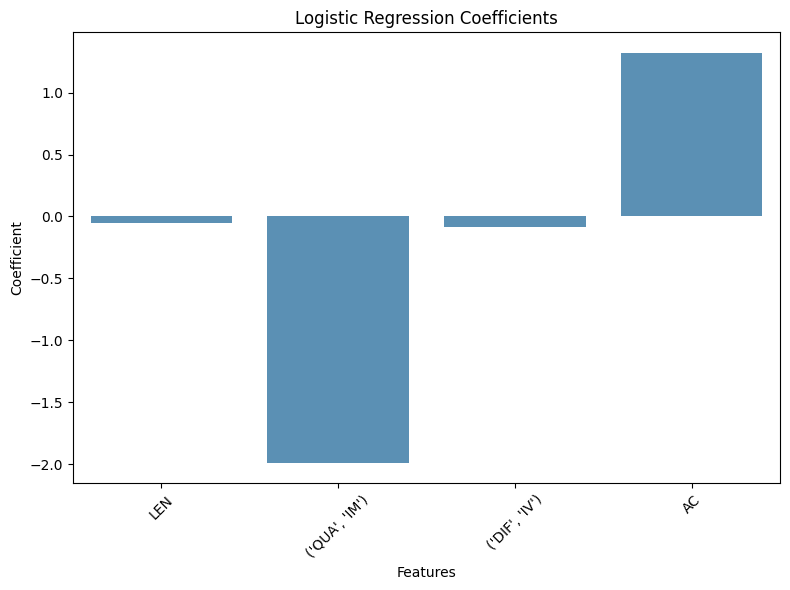

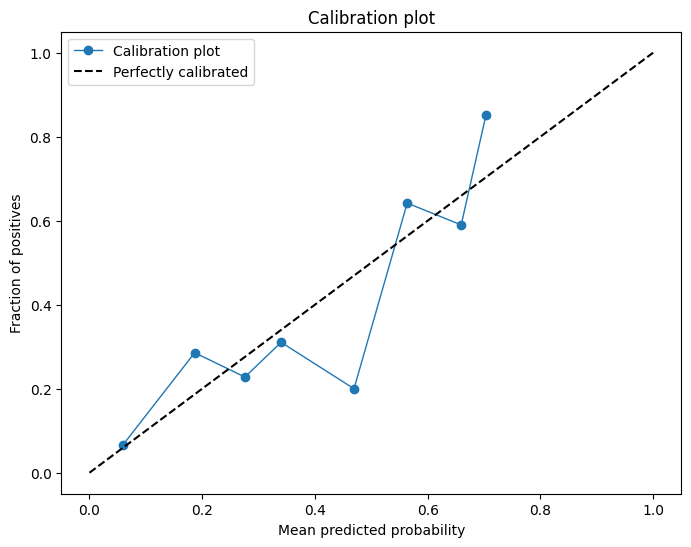

In [98]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


# Separate the features (X) and the outcome variable (y)
X = df_final[['LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC']]
y = df_final['Correctness']



# Calculate the split index
split_idx = int(len(df_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train = df_final[['LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC']].iloc[:split_idx]
y_train = df_final['Correctness'].iloc[:split_idx]
X_test = df_final[['LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC']].iloc[split_idx:]
y_test = df_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train = df_final[['LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC']].iloc[:split_idx]
y_train = df_final['Correctness'].iloc[:split_idx]
X_test = df_final[['LEN', "('QUA', 'IM')", "('DIF', 'IV')", 'AC']].iloc[split_idx:]
y_test = df_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.6601762859097076
The Brier score is: 0.22994993143340905
Log Loss is: 0.6519666171278694


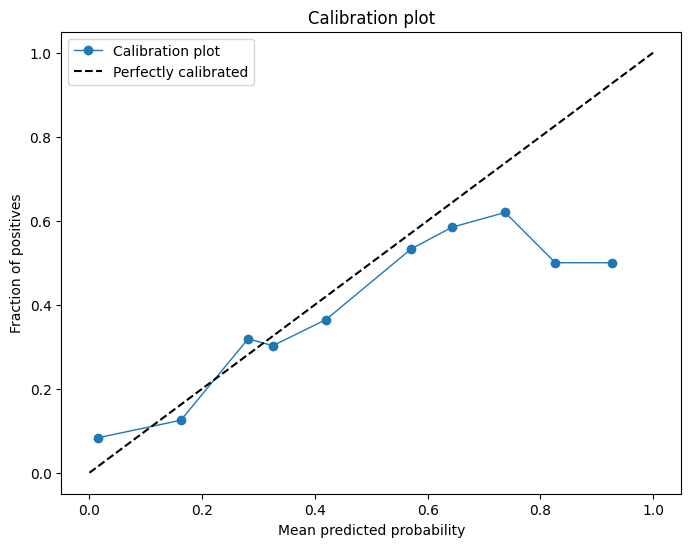

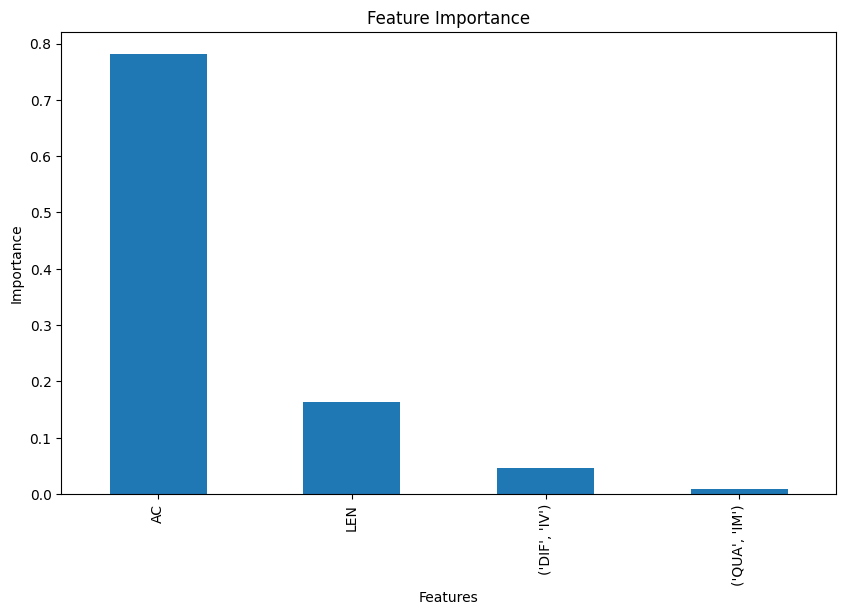

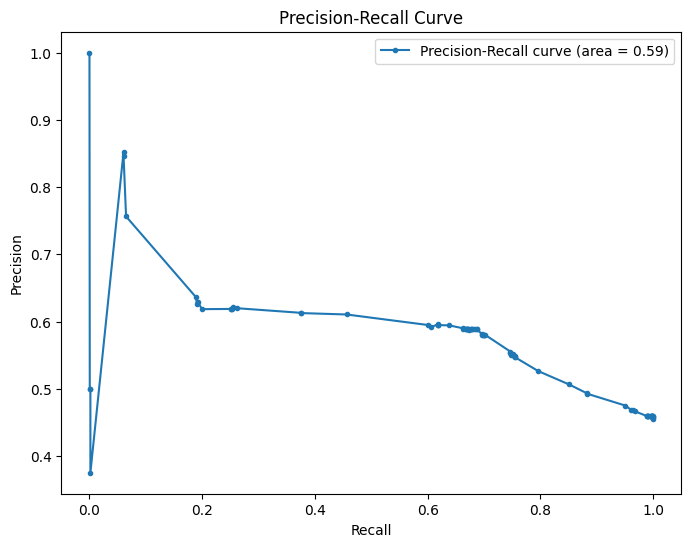

In [99]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

AUROC Score: 0.6686235081662448
Best Threshold: 0.5167469808408528
Confusion Matrix:
[[1332  851]
 [ 564 1253]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      2183
           1       0.60      0.69      0.64      1817

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



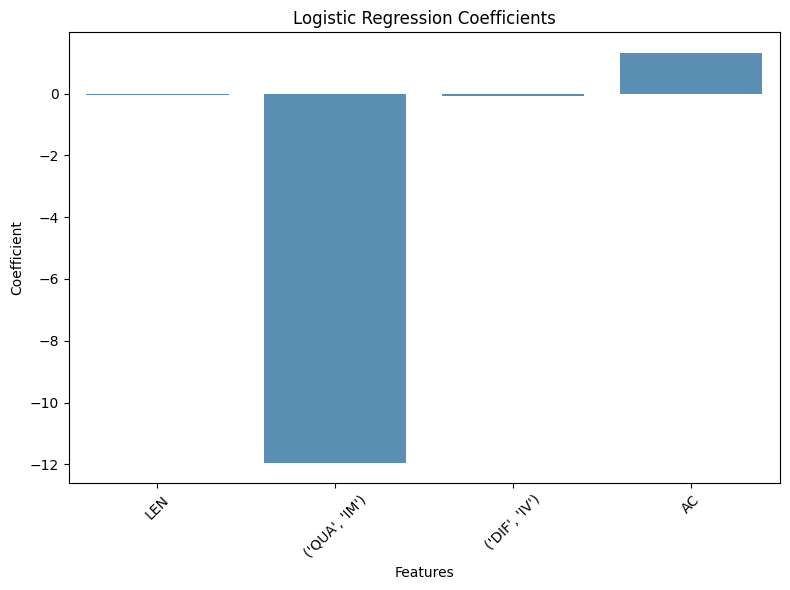

In [100]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test, y_probs > thresh) for thresh in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
The AUROC score is: 0.6597144190448484
The Brier score is: 0.23005823408250267
Log Loss is: 0.6520219420944692


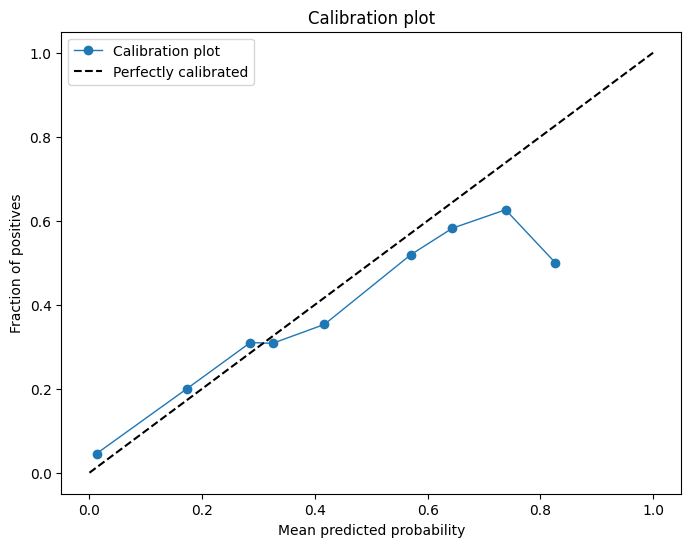

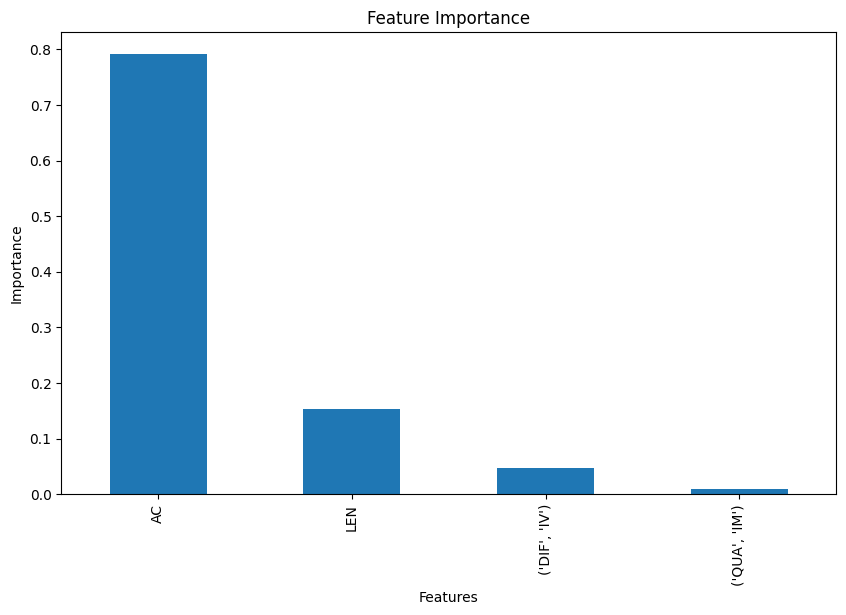

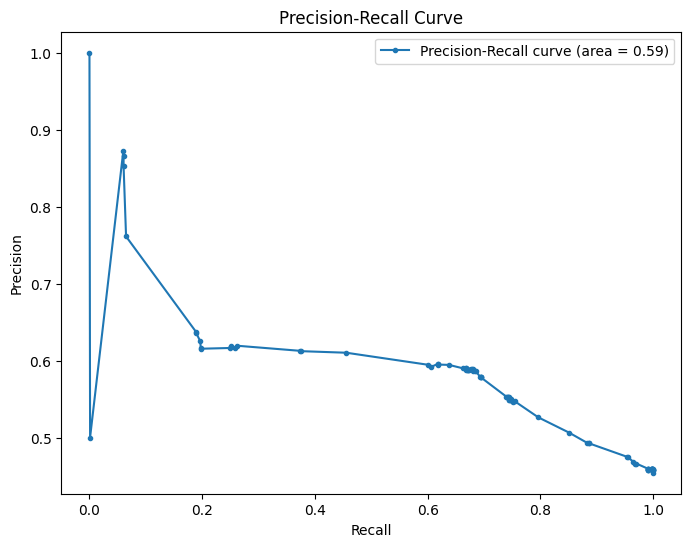

In [101]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['sqrt', 'log2']  # The number of features to consider when looking for the best split
}

# Set up GridSearchCV
clf = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss', verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

# Best model
model = clf.best_estimator_
print("Best model parameters:", model.get_params())

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [102]:
# TODO: 1: Check consistency on the CoT answers and correct answers
#       2: Try an ordinal logistic regression model to predict the correctness of the CoT answers and measure the importance of the features
#       3: Try binary logistic regression model to predict the correctness of the CoT answers and measure the importance of the features if the ordinal logistic regression model does not work(assumption violated)
#       4: Build a scoring function (LR/RF) to predict a confidence score for each CoT answer, and then use the correct binary outcome to verify the corretness of confidence score. (AUROC,calibration plot)

In [103]:
# Confidence_score_based stop and decision making

In [104]:
X_test

,LEN,"('QUA', 'IM')","('DIF', 'IV')",AC
16000,3,0,0,0
16001,5,0,0,0
16002,3,0,0,1
16003,5,0,0,0
16004,3,0,0,0
...,...,...,...,...
19995,5,0,0,0
19996,5,0,0,0
19997,5,0,0,0
19998,4,0,0,0


In [105]:
# Make predictions on the test data (predicting probabilities for the positive class)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Add predictions as a new column to X_test
X_test = X_test.copy()  # To avoid SettingWithCopyWarning
X_test['confidence_score'] = y_pred_proba

# Display the updated X_test DataFrame
print(X_test.head())

       LEN  ('QUA', 'IM')  ('DIF', 'IV')  AC  confidence_score
16000    3              0              0   0          0.405721
16001    5              0              0   0          0.329192
16002    3              0              0   1          0.725019
16003    5              0              0   0          0.329192
16004    3              0              0   0          0.405721


In [148]:
X_test

,LEN,"('QUA', 'IM')","('DIF', 'IV')",AC,confidence_score
16000,3,0,0,0,0.405721
16001,5,0,0,0,0.329192
16002,3,0,0,1,0.725019
16003,5,0,0,0,0.329192
16004,3,0,0,0,0.405721
...,...,...,...,...,...
19995,5,0,0,0,0.329192
19996,5,0,0,0,0.329192
19997,5,0,0,0,0.329192
19998,4,0,0,0,0.312508


In [149]:
y_test

16000    0
16001    1
16002    1
16003    0
16004    1
        ..
19995    0
19996    1
19997    0
19998    1
19999    1
Name: Correctness, Length: 4000, dtype: int64